C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


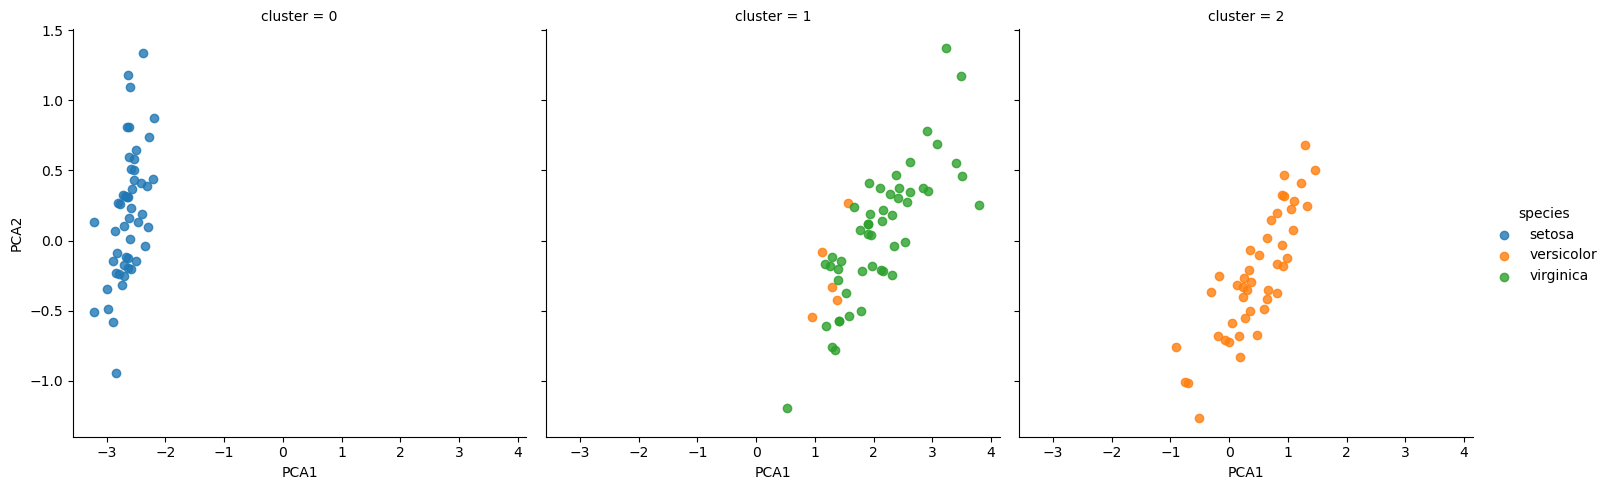

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import mixture

iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis=1)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
model_pca = PCA(n_components=2)
X_2D = model_pca.fit_transform(X_iris)

# Añadir las componentes principales al DataFrame
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# Crear y entrenar el modelo de mezcla gaussiana
model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
model_gmm.fit(X_iris)

# Predecir los clusters
y_gmm = model_gmm.predict(X_iris)
iris['cluster'] = y_gmm

# Graficar usando lmplot
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

# Mostrar el gráfico
plt.show()